In [1]:
import numpy as np
from matplotlib import pyplot as plt

Система
x' = y, y' = x^2 - 1
(1,0) and (-1,0)
x(0) = ? y(0) = ?

In [22]:
# 4 порядок

h = 0.1
steps = 100000

yks = np.array([], dtype = float)


y_n = 0
x_n = -1
yks = np.append(yks, y_n)

for n in range(steps):
    k_1 = h*y_n
    L_1 = h*(x_n*x_n - 1)
    k_2 = h*(y_n + 0.5*L_1)
    L_2 = h*((x_n+0.5*k_1)*(x_n+0.5*k_1) - 1)
    k_3 = h*(y_n + 0.5*L_2)
    L_3 = h*((x_n + 0.5*k_2)*(x_n + 0.5*k_2) - 1)
    k_4 = h*(y_n + L_3)
    L_4 = h*((x_n + L_3)*(x_n + L_3) - 1)
    x_n = x_n + (k_1 + 2*k_2 + 2*k_3 + k_4) / 6
    y_n = y_n + (L_1 + 2*L_2 + 2*L_3 + L_4) / 6
    yks = np.append(yks, y_n)




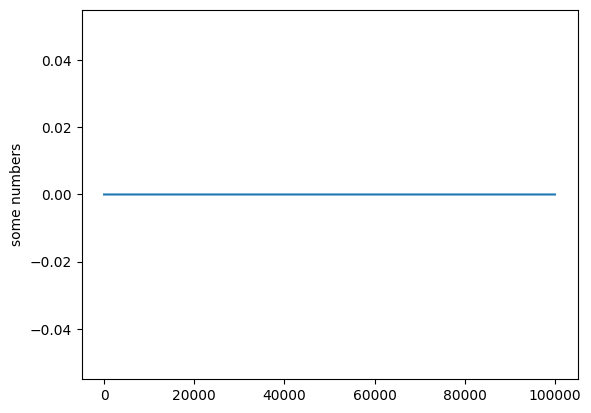

In [23]:
plt.plot(yks)
plt.ylabel('some numbers')
plt.show()

In [24]:
# 3 порядок

h = 0.1
steps = 100000

yks = np.array([], dtype = float)


y_n = 0
x_n = -1
yks = np.append(yks, y_n)

for n in range(steps):
    k_1 = h*y_n
    L_1 = h*(x_n*x_n - 1)
    k_2 = h*(y_n + 0.5*L_1)
    L_2 = h*((x_n+0.5*k_1)*(x_n+0.5*k_1) - 1)
    k_3 = h*(y_n + 2*L_2 - L_1)
    L_3 = h*((x_n +2*k_2 - k_1)*(x_n +2*k_2 - k_1) - 1)

    x_n = x_n + (k_1 + 4*k_2 + k_3) / 6
    y_n = y_n + (L_1 + 4*L_2 + L_3) / 6
    yks = np.append(yks, y_n)



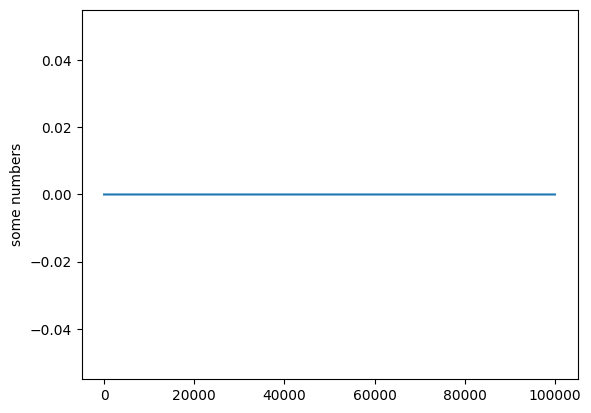

In [25]:
plt.plot(yks)
plt.ylabel('some numbers')
plt.show()